# SUPERVISED LEARNING

## Analysis of bank_churners 


### EXPLORATORY DATA ANALYSIS 

- data types = *qualitatives features : 6* , *quantitatives features : 17*
- SHAPE :  10127 rows , 23 features   
*there is no target here , so we have to group data in two cluster*
- MISSING VALUES : No missing values
- FEATURES : here the most users are mainly women
    - most people who attirted the company are commonly using blue cards
    - most pleople who are in the company uses also blue cards
    - some features have some outliers and the most importants are Total_Amt_Chng_Q4_Ql and Total_Ct_Chng_Q4_Ql and at last Costumer_Age
    - also we can try to remove the feature named : 'CLIENTNUM' becauseof no importance
    
- 

In [1]:
import pandas as pd

data = pd.read_csv('pratices/BankChurners.csv')
pd.set_option('display.max_columns', 24)
data.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": 'n_flag_1',
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" : "n_flag_2" }, inplace=True)
data.drop('CLIENTNUM', axis=1, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
data.Attrition_Flag.value_counts()#normalize=True)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

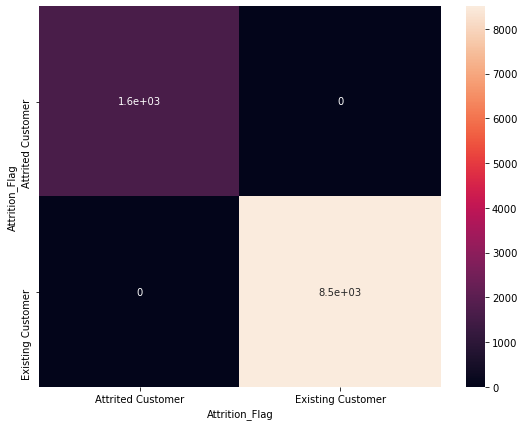

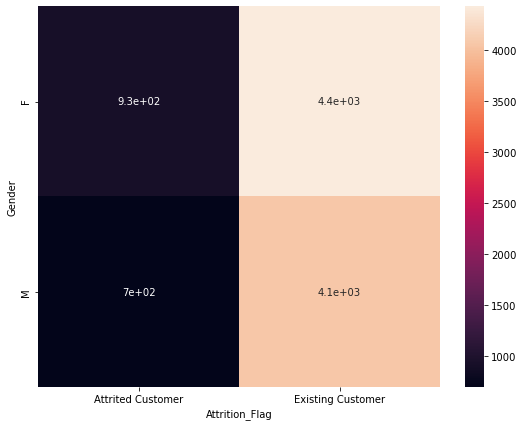

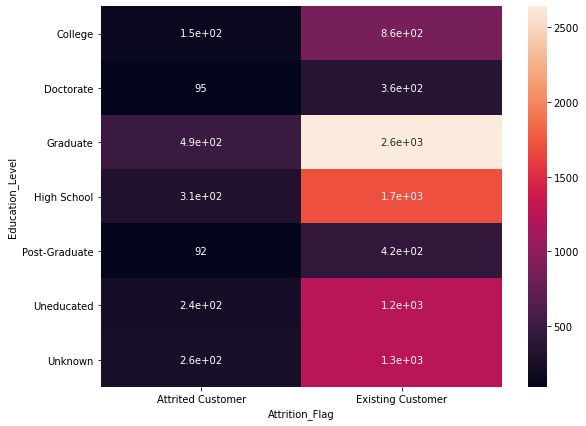

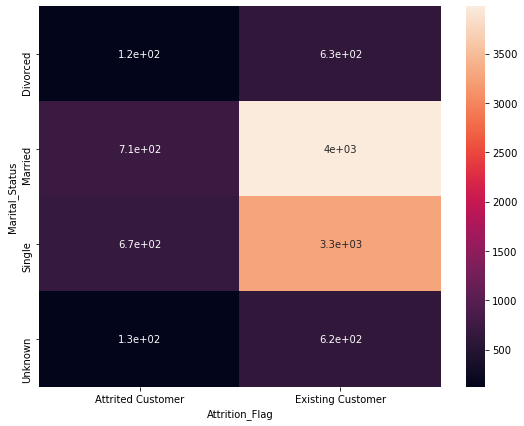

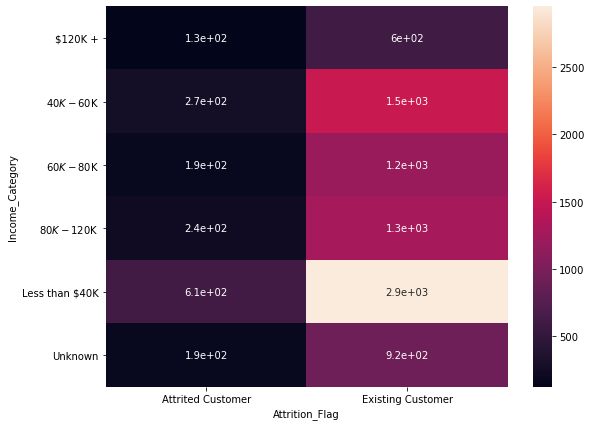

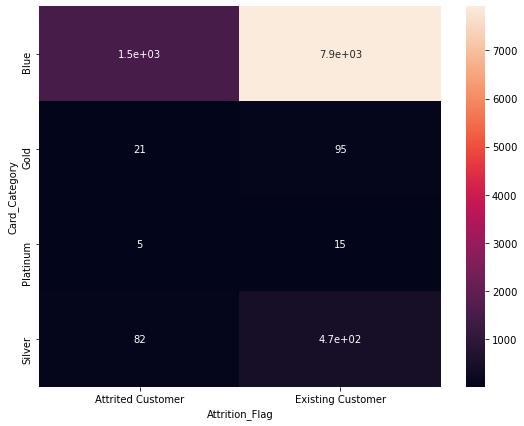

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.select_dtypes('object'):
    x = plt.figure(figsize=(9,7))
    sns.heatmap(pd.crosstab(data[i], data['Attrition_Flag']), annot=True)


<AxesSubplot:>

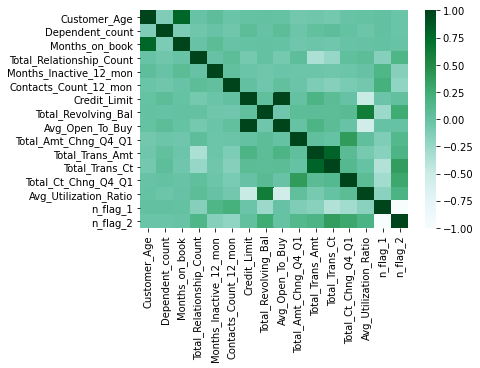

In [4]:
sns.heatmap(data.corr(), cmap='BuGn')

## Preprocessing now

In [5]:
# importation of dataset

data_prepro = data.copy()
data_prepro.drop(["n_flag_1", "n_flag_2"],axis=1, inplace=True)


In [18]:
class Preprocess :
    
    def __ini__(self):
        pass
    
    def __repr__(self):
        return 'Here we are in class Preprocessing \nType "dir(Preprocess)", to see all alternatives'
    
    ## Preprocess : Splitting in train and test sets
    def split(self, data):
        from sklearn.model_selection import train_test_split
        
        self.X = data.drop('Attrition_Flag', axis=1)
        self.Y = data['Attrition_Flag']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, random_state=42)
        print('Train : ',self.X_train.shape,'\nTest : ', self.X_test.shape)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    ## Preprocess : dealing with missing values
    def missings(self, data):
            # if to delete data use dropna from pandas
        data = data.dropna(axis=1)
        return data
            # if need to fill NA values use impute methods
        #from sklearn.impute import SimpleImputer
        #self.model = SimpleImputer(strategy='most_frequent')
        #self.model.fit(data)
        #return self.model.transform(data)
        
    ## Preprocess : converting string to int
    def encoder(self, data):
        for self.dt in data.select_dtypes("object"):
            data[self.dt] = data[self.dt].astype('category').cat.codes
        return data
            # if need for onehotencoding 
        #from sklearn.preprocessing import OneHotEncoder
        #self.model = OneHotEncoder()
        #for dt in data.select_dtypes(include='object'):
            #data[dt] = self.model.fit_transform(data[dt])
    
    ## Preprocess :  Standardisation
    def standar(self, data):
        from sklearn.prepocessing import MinMaxScaler
        
        self.model = MinMaxScaler()
        self.transformation = self.model.fit_transform(data)
        return self.transformation
    
    ## Preprocess : handling outilers and inliers
    def outliers(self,data):
        from sklearn.ensemble import IsolationForest
            #  in case of needof PCA
        #from sklearn.decomposition import PCA
        #self.model = PCA(n_components=0.95)
        #self.model.fit(data)
        #return self.model.transform(data)
        
        self.model = IsolationForest(contamination= 0.15)
        self.model.fit(data)
        return self.model.transform(data)
    
    ## Preprocess : in case of need of polynomialFeatures
    def poly_features(self, data):
        from sklearn.preprocessing import PolynomialFeatures
        
        self.model = PolynomialFeatures(2)
        self.fit(data)
        return self.model.transform(data)
    
   
    ## Preprocess : regression model just for testing preprocess
    def regression(self, model=None, X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
        
    
    ## Preprocess : classification model just for testing preprocess
    def classification(self, model=None,  X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
    
    def curves(self,model=None, X_train=None, y_train=None):
        from sklearn.model_selection import learning_curve
        import numpy as np
        import matplotlib.pyplot as plt
        
        N, train, val = learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1,1.,10))
        plt.plot(N, train.mean(axis=1), label="training")
        plt.plot(N, val.mean(axis=1), label="validation")
        plt.scatter([],[], label=model.__class__.__name__)
        plt.legend()
        

In [19]:
prepro = Preprocess()
prepro

Here we are in class Preprocessing 
Type "dir(Preprocess)", to see all alternatives

In [20]:
prepro.encoder(data_prepro)
data_prepro

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [21]:
X_train, X_test, y_train, y_test = prepro.split(data_prepro)

Train :  (7595, 19) 
Test :  (2532, 19)


Linear  :  0.8803317535545023


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Svm_simple  :  0.834518167456556
Neighbors  :  0.8878357030015798
EnsembleForest  :  0.957345971563981
EnsembleAdaboost  :  0.9545813586097947
Tree  :  0.9249605055292259
Naives_gnb  :  0.8815165876777251
Sgdclass  :  0.8451816745655608


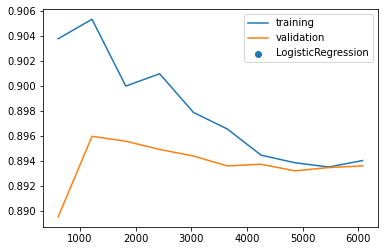

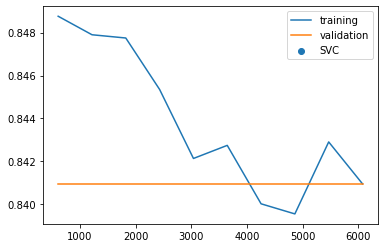

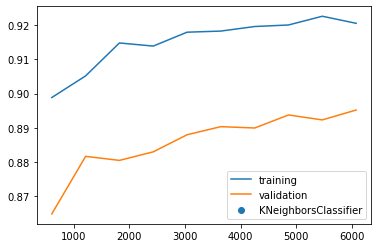

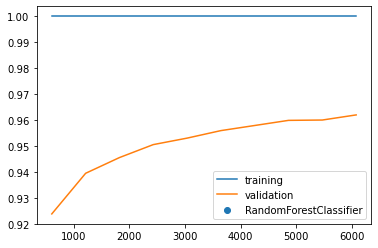

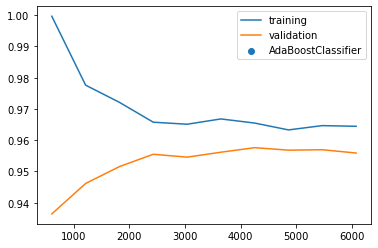

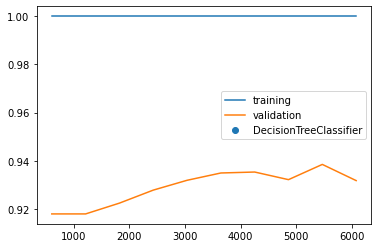

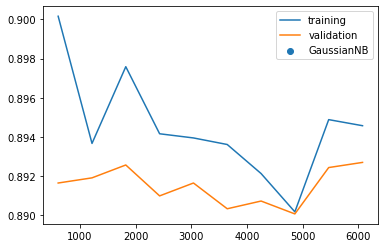

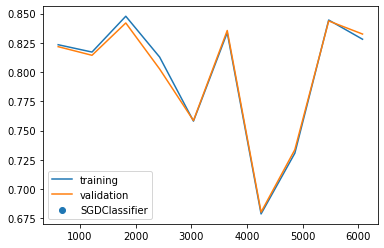

In [23]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Linear": LogisticRegression(max_iter=1000),
    "Svm_simple" : SVC(),
    "Neighbors" : KNeighborsClassifier(),
    "EnsembleForest" : RandomForestClassifier(random_state=42),
    "EnsembleAdaboost" : AdaBoostClassifier(random_state=42),
    "Tree" : DecisionTreeClassifier(random_state=42), 
    "Naives_gnb" : GaussianNB(),
    "Sgdclass" : SGDClassifier()
}

for name,model in models.items() :  
    print(name, ' : ', prepro.classification( model, X_train, y_train, X_test, y_test))
    plt.figure()
    prepro.curves(model, X_train, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
model = KNeighborsClassifier()
model2= LinearSVC(max_iter=1000)

print(prepro.classification(model2, X_train, y_train, X_test, y_test))
prepro.curves(model2, X_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.844391785150079


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations